<div class="alert alert-block alert-success">
<h1>Load EEG data by MNE-bids</h1>
</div>

In [1]:
%matplotlib inline
import os
import os.path as op
import mne
import numpy as np
import pandas as pd

from mne.datasets import sample
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report

In [2]:
import openneuro
from mne.datasets import sample

In [3]:
dataset = 'ds002778'
subject = 'pd6'

# Download one subject's data from each dataset
bids_root = op.join(op.dirname(sample.data_path()), dataset)
if not op.isdir(bids_root):
    os.makedirs(bids_root)

# openneuro does not work in jupyter now: https://github.com/hoechenberger/openneuro-py/issues/51
# openneuro.download(dataset=dataset, target_dir=bids_root,
#                    include=[f'sub-{subject}'])

In [3]:
dataset = 'BIDS'
subject = 'sub-005'

root_dir = '/home/hcp4715/Data/EEGdata/moralSelfEEG2015/Analysis_Py/Exp1'
# Download one subject's data from each dataset
bids_root = op.join(root_dir, dataset)
bids_root

'/home/hcp4715/Data/EEGdata/moralSelfEEG2015/Analysis_Py/Exp1/BIDS'

In [5]:
print_dir_tree(bids_root, max_depth=4)

|ds002778/
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-pd6/
|------ ses-off/
|--------- sub-pd6_ses-off_scans.tsv
|--------- beh/
|------------ sub-pd6_ses-off_task-rest_beh.json
|------------ sub-pd6_ses-off_task-rest_beh.tsv
|--------- eeg/
|------------ sub-pd6_ses-off_task-rest_channels.tsv
|------------ sub-pd6_ses-off_task-rest_eeg.bdf
|------------ sub-pd6_ses-off_task-rest_eeg.json
|------------ sub-pd6_ses-off_task-rest_events.tsv
|------ ses-on/
|--------- sub-pd6_ses-on_scans.tsv
|--------- beh/
|------------ sub-pd6_ses-on_task-rest_beh.json
|------------ sub-pd6_ses-on_task-rest_beh.tsv
|--------- eeg/
|------------ sub-pd6_ses-on_task-rest_channels.tsv
|------------ sub-pd6_ses-on_task-rest_eeg.bdf
|------------ sub-pd6_ses-on_task-rest_eeg.json
|------------ sub-pd6_ses-on_task-rest_events.tsv


In [6]:
print(make_report(bids_root))

Summarizing participants.tsv /home/hcp4715/mne_data/ds002778/participants.tsv...
Summarizing scans.tsv files [PosixPath('/home/hcp4715/mne_data/ds002778/sub-pd6/ses-on/sub-pd6_ses-on_scans.tsv'), PosixPath('/home/hcp4715/mne_data/ds002778/sub-pd6/ses-off/sub-pd6_ses-off_scans.tsv')]...
The participant template found: comprised of 14 male and 17 female participants;
comprised of 31 right hand, 0 left hand and 0 ambidextrous; ages ranged from 47.0 to 82.0 (mean = 63.39, std = 8.69)
The UC San Diego Resting State EEG Data from Patients with Parkinson's Disease
dataset was created by Alexander P. Rockhill, Nicko Jackson, Jobi George, Adam
Aron, and Nicole C. Swann and conforms to BIDS version 1.2.2. This report was
generated with MNE-BIDS (https://doi.org/10.21105/joss.01896). The dataset
consists of 1 participants (comprised of 14 male and 17 female participants;
comprised of 31 right hand, 0 left hand and 0 ambidextrous; ages ranged from
47.0 to 82.0 (mean = 63.39, std = 8.69)) and 2 rec

In [9]:
datatype = 'eeg'
session = 'off'
bids_path = BIDSPath(root=bids_root, session=session, datatype=datatype)

In [10]:
print(bids_path.match())

[BIDSPath(
root: /home/hcp4715/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_channels.tsv), BIDSPath(
root: /home/hcp4715/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_eeg.bdf), BIDSPath(
root: /home/hcp4715/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_events.tsv)]


In [11]:
print(bids_path.match())

[BIDSPath(
root: /home/hcp4715/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_channels.tsv), BIDSPath(
root: /home/hcp4715/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_eeg.bdf), BIDSPath(
root: /home/hcp4715/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_events.tsv)]


In [12]:
task = 'rest'
suffix = 'eeg'

bids_path = BIDSPath(subject=subject, session=session, task=task,
                     suffix=suffix, datatype=datatype, root=bids_root)

In [14]:
print(bids_path)

/home/hcp4715/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf


In [15]:
raw = read_raw_bids(bids_path=bids_path, verbose=False)

Extracting EDF parameters from /home/hcp4715/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /home/hcp4715/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_events.tsv.
Reading channel info from /home/hcp4715/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_channels.tsv.


In [16]:
print(raw.info['subject_info'])

{'his_id': 'sub-pd6', 'age': '62', 'gender': 'f', 'hand': 1, 'MMSE': '30', 'NAART': '42', 'disease_duration': '8', 'rl_deficits': 'L OFF meds, more R ON meds', 'notes': 'Used preprocessed data from EEGLAB .mat file instead of raw data for pd on'}


In [17]:
print(raw.info['line_freq'])

60


In [18]:
print(raw.annotations)

<Annotations | 2 segments: 1 (1), 65536 (1)>


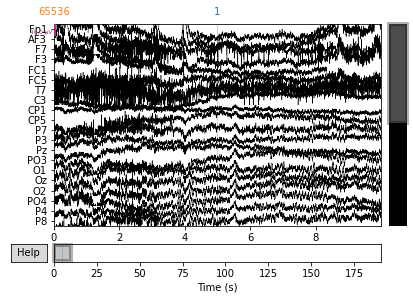

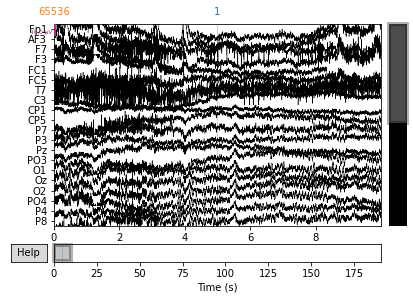

In [19]:
raw.plot()